Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

Import Data

In [2]:
df = pd.read_csv('datasets/online_retail.csv')

Get Glimpse about Our Data

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Data Perprocessing

In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Discover Missing Values

In [49]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<AxesSubplot:>

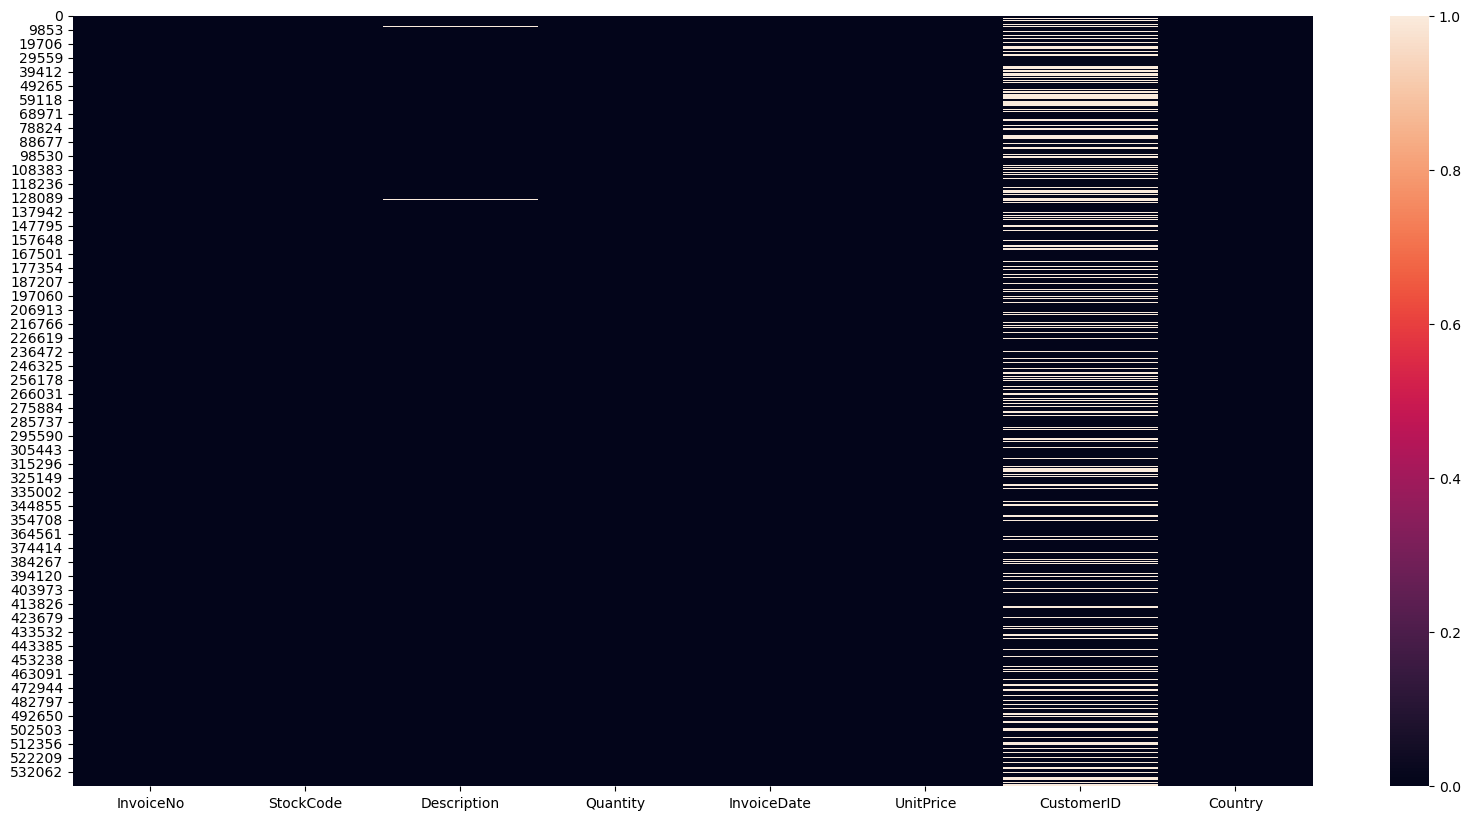

In [27]:
plt.figure(figsize=(20,10))
sn.heatmap(df.isna())

Fill Missing Values

In [3]:
df['CustomerID'].ffill(inplace=True)

In [4]:
df['Description'].ffill(inplace=True)

Discover Duplicates

In [61]:
df.duplicated().sum()

5268

In [53]:
df[df.duplicated()].sort_values(by='UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
242427,558340,22430,ENAMEL WATERING CAN CREAM,1,2011-06-28 14:01:00,0.00,16928.0,United Kingdom
242424,558340,22627,MINT KITCHEN SCALES,1,2011-06-28 14:01:00,0.00,16928.0,United Kingdom
41483,539856,22518,CHILDS GARDEN BRUSH BLUE,1,2010-12-22 14:41:00,0.00,12383.0,United Kingdom
193193,553521,22684,FRENCH BLUE METAL DOOR SIGN 9,2,2011-05-17 14:35:00,0.00,17238.0,United Kingdom
14359,537534,22520,CHILDS GARDEN TROWEL BLUE,1,2010-12-07 11:48:00,0.00,13319.0,United Kingdom
...,...,...,...,...,...,...,...,...
436010,574080,23008,DOLLY GIRL BABY GIFT SET,1,2011-11-02 16:29:00,16.95,16348.0,United Kingdom
155285,549981,23007,SPACEBOY BABY GIFT SET,1,2011-04-13 15:49:00,16.95,16348.0,United Kingdom
514741,579744,23010,CIRCUS PARADE BABY GIFT SET,1,2011-11-30 14:38:00,16.95,16910.0,United Kingdom
438317,574311,22946,WOODEN ADVENT CALENDAR CREAM,1,2011-11-03 16:56:00,16.95,15640.0,United Kingdom


Delete Duplicates

In [5]:
df.drop_duplicates(inplace=True)

Convert Data Types

In [17]:
df['CustomerID'] = df['CustomerID'].astype('int')

In [16]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int32         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 31.0+ MB


Discover Outliers

In [89]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,541909.00
mean,9.55,4.61,15272.80
std,218.08,96.76,1737.93
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13798.00
50%,3.00,2.08,15145.00
75%,10.00,4.13,16803.00
max,80995.00,38970.00,18287.00


<AxesSubplot:>

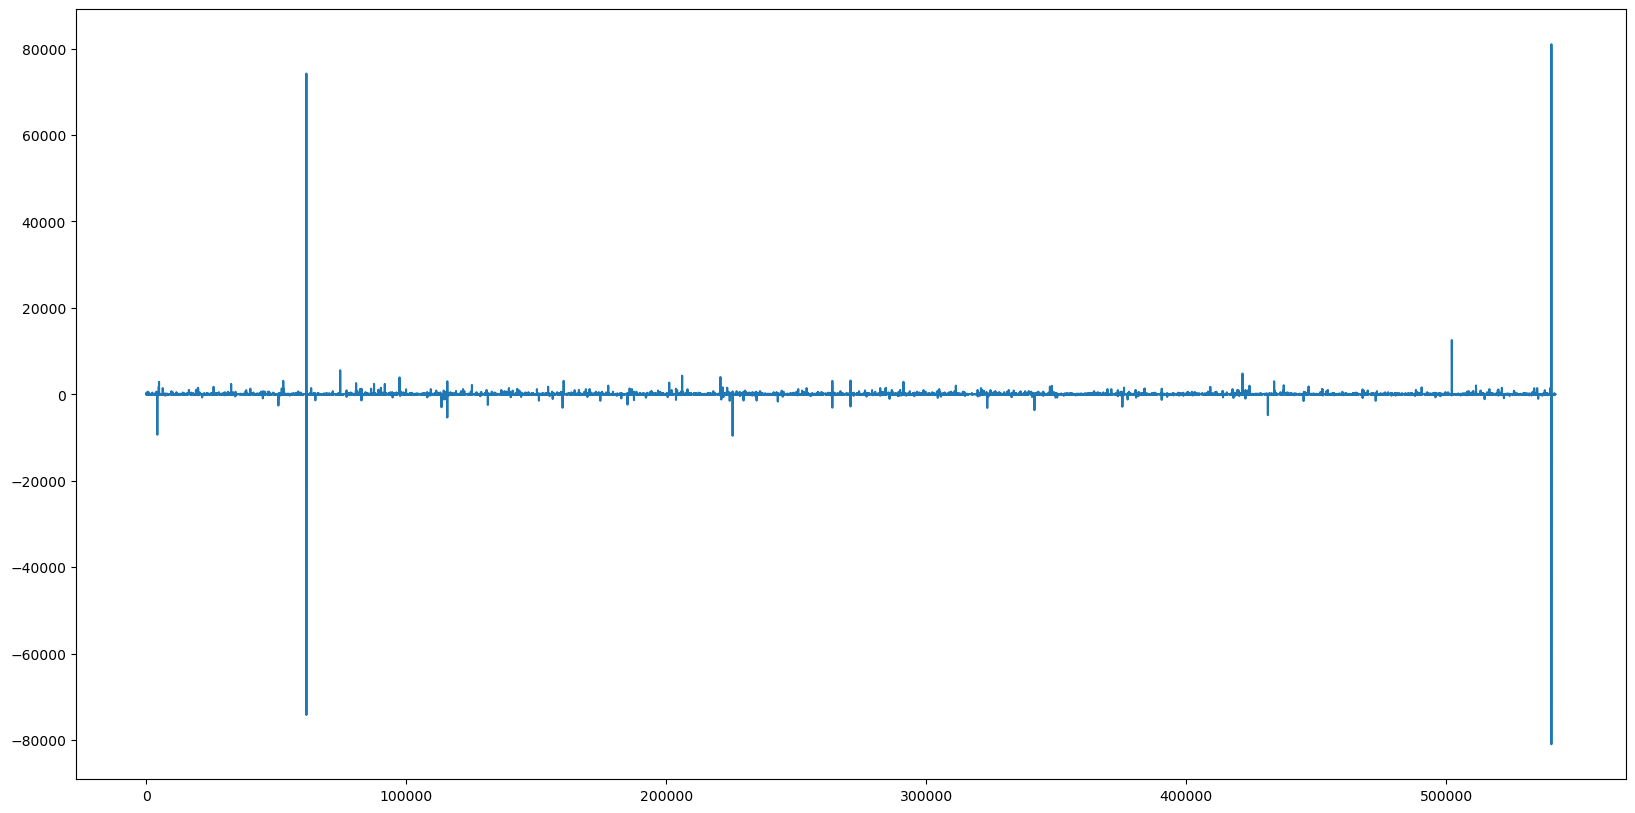

In [86]:
plt.figure(figsize=(20,10))
df['Quantity'].plot()

array([[<AxesSubplot:title={'center':'Quantity'}>]], dtype=object)

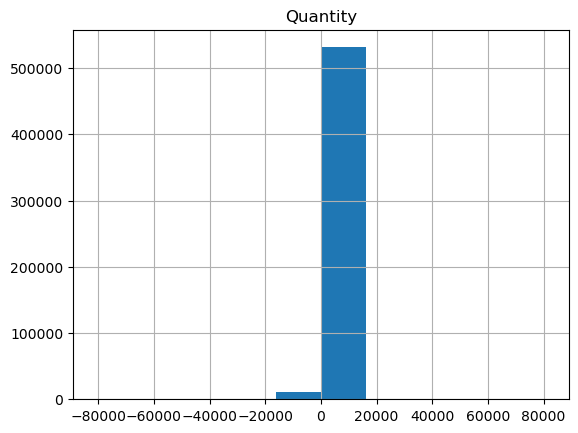

In [90]:
df.hist(column='Quantity')

<AxesSubplot:>

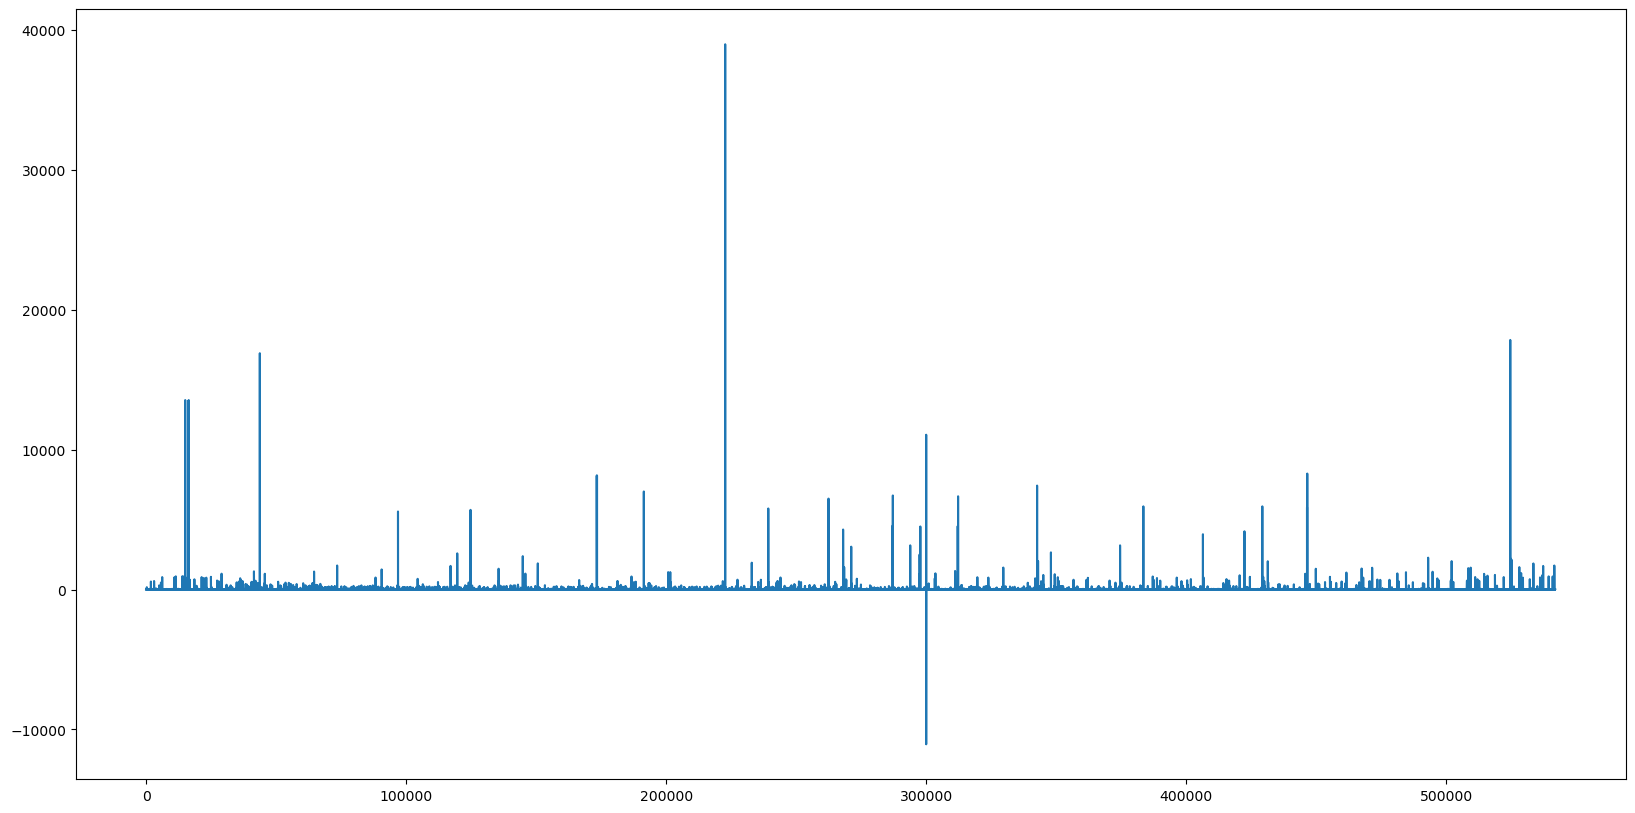

In [87]:
plt.figure(figsize=(20,10))
df['UnitPrice'].plot()

array([[<AxesSubplot:title={'center':'UnitPrice'}>]], dtype=object)

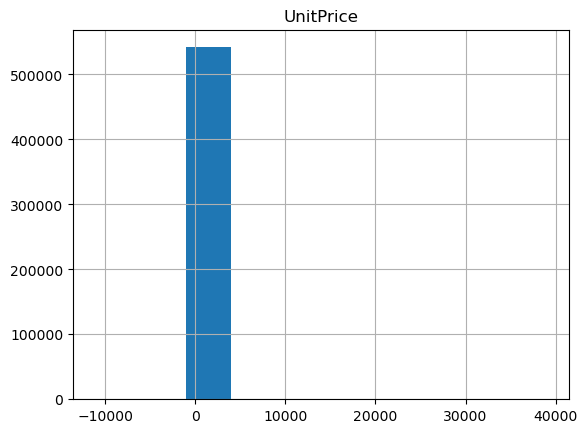

In [93]:
df.hist(column='UnitPrice')

Dealing With Outliers

In [ ]:
df['Quantity'] = df['Quantity'] 

In [94]:
df['Quantity'] = df['Quantity'] / df['Quantity'].max()

In [95]:
df['UnitPrice'] = df['UnitPrice'] / df['UnitPrice'].max()

In [8]:
df['Quantity'] = df['Quantity'].abs()

In [9]:
df['UnitPrice'] = df['UnitPrice'].abs()

EDA

Get view for our Data

In [187]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
105035,545216,22624,IVORY KITCHEN SCALES,1,2011-02-28 16:50:00,8.50,17165,United Kingdom
315637,564733,23286,BLUE VINTAGE SPOT BEAKER,1,2011-08-28 13:18:00,0.85,17841,United Kingdom
58433,541241,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,2,2011-01-16 11:08:00,2.95,13782,United Kingdom
272811,560773,84078A,SET/4 WHITE RETRO STORAGE CUBES,1,2011-07-20 16:17:00,58.29,17754,United Kingdom
149849,549307,22722,SET OF 6 SPICE TINS PANTRY DESIGN,4,2011-04-08 09:08:00,3.95,15119,United Kingdom
81271,543116,22047,EMPIRE GIFT WRAP,25,2011-02-03 13:29:00,0.42,17672,United Kingdom
428311,573420,22197,POPCORN HOLDER,48,2011-10-31 09:48:00,0.85,18223,United Kingdom
348081,567375,23298,SPOTTY BUNTING,9,2011-09-20 09:45:00,4.95,14766,United Kingdom
157277,550197,15056P,EDWARDIAN PARASOL PINK,2,2011-04-15 10:14:00,5.95,15581,United Kingdom
192438,553415,23084,RABBIT NIGHT LIGHT,6,2011-05-17 10:02:00,2.08,12463,Belgium


Get Some Statstics for Quantity & UnitPrice Per Country With some visualizations

Get describe for Quantity Column

In [181]:
df['Quantity'].describe().round(1)

count    536641.0
mean         11.4
std         219.0
min           1.0
25%           1.0
50%           3.0
75%          11.0
max       80995.0
Name: Quantity, dtype: float64

Get describe for Price Column

In [182]:
df['UnitPrice'].describe().round(1)

count    536641.0
mean          4.7
std          97.2
min           0.0
25%           1.2
50%           2.1
75%           4.1
max       38970.0
Name: UnitPrice, dtype: float64

In [188]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [153]:
qua_max = df['Quantity'].max()
df[df['Quantity'] == qua_max]['Country']

540421    United Kingdom
540422    United Kingdom
Name: Country, dtype: object

In [175]:
qua_min = df['Quantity'].min()
df[df['Quantity'] == qua_min]['Country']

113       United Kingdom
114       United Kingdom
115       United Kingdom
118       United Kingdom
120       United Kingdom
               ...      
541851    United Kingdom
541855    United Kingdom
541856    United Kingdom
541857    United Kingdom
541859    United Kingdom
Name: Country, Length: 148658, dtype: object

In [189]:
uni_max = df['UnitPrice'].max()
df[df['UnitPrice'] == uni_max]['Country']

222681    United Kingdom
Name: Country, dtype: object

In [190]:
uni_min = df['UnitPrice'].min()
df[df['UnitPrice'] == uni_min]['Country']

622       United Kingdom
1970      United Kingdom
1971      United Kingdom
1972      United Kingdom
1987      United Kingdom
               ...      
536981    United Kingdom
538504    United Kingdom
538505    United Kingdom
538554    United Kingdom
538919    United Kingdom
Name: Country, Length: 2510, dtype: object

In [163]:
df.pivot_table(index='Country',values='Quantity',aggfunc=np.sum)

,Quantity
Country,
Australia,84755
Austria,4935
Bahrain,368
Belgium,23322
Brazil,356
Canada,2763
Channel Islands,9497
Cyprus,6384
Czech Republic,750


Text(0.5, 1.0, 'Quantity per Country')

<Figure size 2000x1000 with 0 Axes>

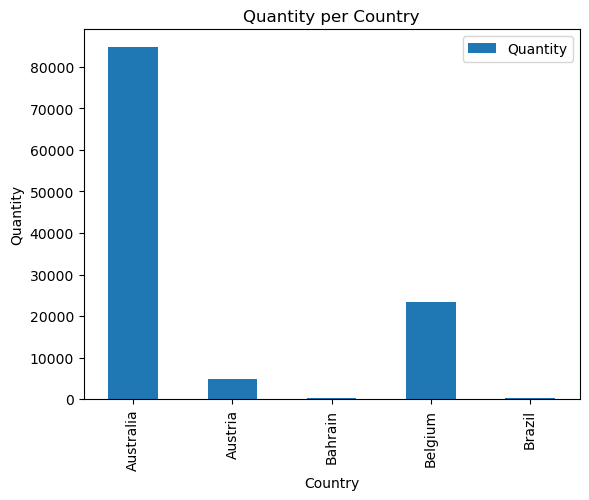

In [167]:
plt.figure(figsize=(20,10))
df.pivot_table(index='Country',values='Quantity',aggfunc=np.sum).head(5).plot(kind='bar')
plt.ylabel('Quantity')
plt.title('Quantity per Country')

Text(0.5, 1.0, 'Quantity per Country')

<Figure size 2000x1000 with 0 Axes>

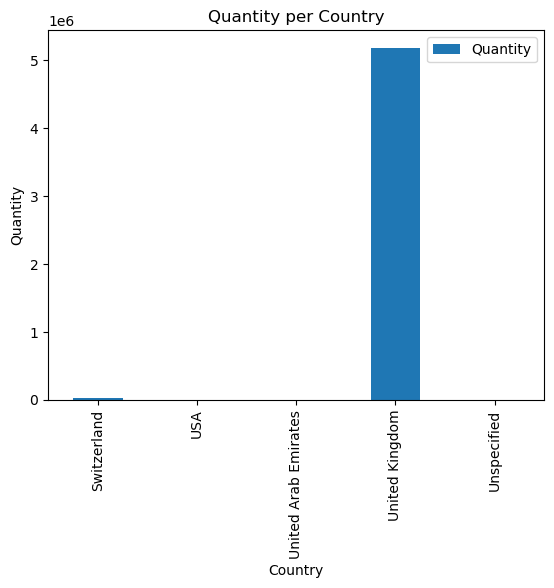

In [168]:
plt.figure(figsize=(20,10))
df.pivot_table(index='Country',values='Quantity',aggfunc=np.sum).tail(5).plot(kind='bar')
plt.ylabel('Quantity')
plt.title('Quantity per Country')

Text(0.5, 1.0, 'UnitPrice per Country')

<Figure size 2000x1000 with 0 Axes>

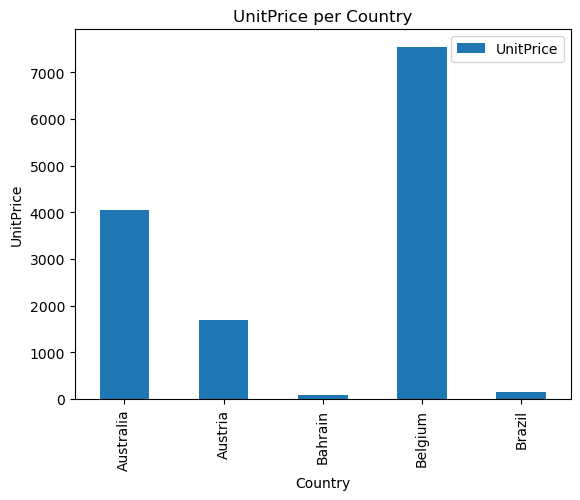

In [171]:
plt.figure(figsize=(20,10))
df.pivot_table(index='Country',values='UnitPrice',aggfunc=np.sum).head(5).plot(kind='bar')
plt.ylabel('UnitPrice')
plt.title('UnitPrice per Country')

Text(0.5, 1.0, 'Quantity per UnitPrice')

<Figure size 2000x1000 with 0 Axes>

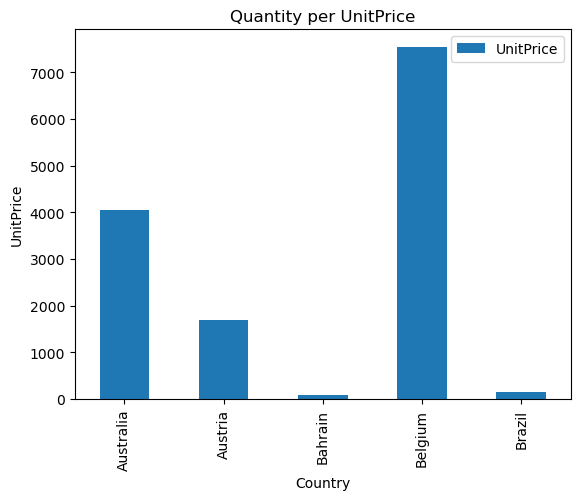

In [170]:
plt.figure(figsize=(20,10))
df.pivot_table(index='Country',values='UnitPrice',aggfunc=np.sum).head(5).plot(kind='bar')
plt.ylabel('UnitPrice')
plt.title('UnitPrice per Country')

Get Sate Of sales Per Date

Text(0.5, 1.0, 'Sales per Date')

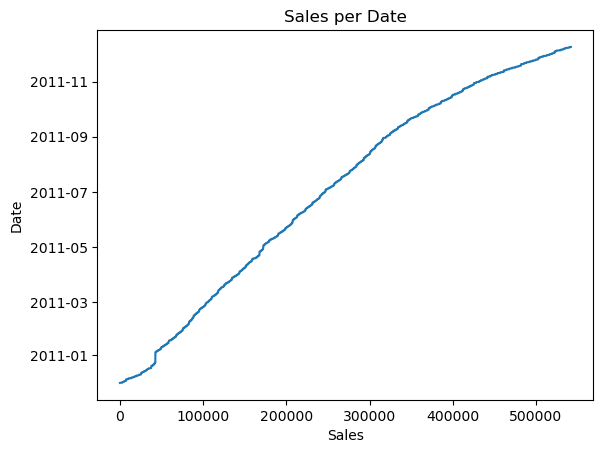

In [186]:
df['InvoiceDate'].plot()
plt.ylabel('Date')
plt.xlabel('Sales')
plt.title('Sales per Date')

In [30]:
finaldata = df.to_csv('datamodfiy.csv')